# Ejemplo de PCA

### Andrés Nieto Guadarrama

In [9]:
#!conda install tensorflow
#!pip install h5py==2.8.0 
#!conda install tensorflow
from sklearn.decomposition import PCA
from numpy.linalg import svd
from tensorflow.keras import datasets
import numpy as np

In [2]:
train, test = datasets.mnist.load_data()
xtrain, ytrain = train

### Modelos

Consideremos un modelo coque combina PCA con kmeans y otro que solo aplica $\textit{kmeans}$. Dado que PCA permite replicar un porcentaje significativo de la información (medida como la varianza) de toda una nube de datos a partir de una base de dimensión mucho menor que la cantidad de observaciones originales, esperamos que el modelo combinado de PCA y kmeans se desmpeñe más rápido que usando solamente $\textit{kmeans}$.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

n,m1,m2=xtrain.shape

pipe_PCA_kmean=Pipeline([('pca',PCA(n_components=0.7)),('kmean',KNeighborsClassifier(n_neighbors=5))])
pipe_kmean=Pipeline([('kmean',KNeighborsClassifier(n_neighbors=5))])

pipe_PCA_kmean.fit(xtrain.reshape(n,-1),ytrain.reshape(len(ytrain),1))
pipe_kmean.fit(xtrain.reshape(n,-1),ytrain.reshape(len(ytrain),1))

C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('kmean',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

### Resultados

In [22]:
%%time
from sklearn.model_selection import cross_val_score,cross_validate
cv_PCA_kmean = cross_validate(pipe_PCA_kmean, xtrain.reshape(n,-1), ytrain.reshape(len(ytrain),1), cv=3, scoring=["r2"])
print(f"Coeficiente de determinación modelo PCA + Kmeans: {cv_PCA_kmean['test_r2'].mean()}")

C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Coeficiente de determinación modelo PCA + Kmeans: 0.9387719758540674
Wall time: 1min 2s


In [70]:
print(f"Score del modelo combinando PCA y kmeans: {round(100*pipe_PCA_kmean.score(xtrain.reshape(n,-1), ytrain.reshape(len(ytrain),1)),2)}%")

Score del modelo combinando PCA y kmeans: 98.42%


Podemos ver que el modelo es bastante preciso:

In [25]:
y_obs=ytrain.reshape(len(ytrain),1)
y_hat=pipe_PCA_kmean.predict(xtrain.reshape(n,-1))

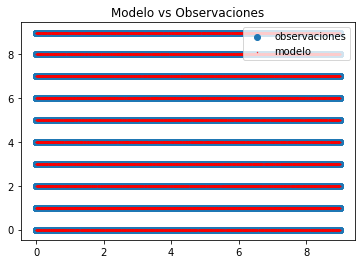

In [65]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(ytrain.min(),ytrain.max(),len(ytrain)),y_obs,label="observaciones")
plt.scatter(np.linspace(y_hat.min(),y_hat.max(),len(ytrain)),y_hat,label="modelo",marker='o',color='r',s=.15)
plt.legend(loc=1)
plt.title("Modelo vs Observaciones")
plt.show()


In [21]:
%%time
cv_kmean = cross_validate(pipe_kmean, xtrain.reshape(n,-1), ytrain.reshape(len(ytrain),1), cv=3, scoring=["r2"])
print(f"Coeficiente de determinación modelo Kmeans: {cv_kmean['test_r2'].mean()}")

C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Coeficiente de determinación modelo Kmeans: 0.929619765430278
Wall time: 45min 56s


### Conclusión

Tal y como esperábamos, el modelo combinado se desempeñó mucho más rápido que aplicando el método de kmeans por separado. Además, el modelo por separado se desempeña un poco mejor en términos del score, medido como $R^2$ a pesar de la pérdida de información inherente a PCA.